<a href="https://colab.research.google.com/github/Shalu-Yadav0811/Car-Price-Prediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score
from os import error

Data Collection and Processing

In [11]:
# Loading the data from csv file to pandas DataFrame
car_dataset = pd.read_csv('/content/Car Details.csv')

In [12]:
# Inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
# Checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [14]:
# Getting some information about the Dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [15]:
# Checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [16]:
# Checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [17]:
# Encoding "fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# Encoding "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1}},inplace=True)

# Encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# Encoding "owner" column
car_dataset.replace({'owner':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}},inplace=True)

<ipython-input-17-ffe1772fb004>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
<ipython-input-17-ffe1772fb004>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
<ipython-input-17-ffe1772fb004>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

In [18]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,2


Splitting the data into Training data and Test data

In [19]:
X = car_dataset.drop(columns=['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [20]:
print(X)

      year  km_driven  fuel seller_type  transmission  owner
0     2007      70000     0           0             0      1
1     2007      50000     0           0             0      1
2     2012     100000     1           0             0      1
3     2017      46000     0           0             0      1
4     2014     141000     1           0             0      2
...    ...        ...   ...         ...           ...    ...
4335  2014      80000     1           0             0      2
4336  2014      80000     1           0             0      2
4337  2009      83000     0           0             0      2
4338  2016      90000     1           0             0      1
4339  2016      40000     0           0             0      1

[4340 rows x 6 columns]


In [21]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting the data and Target

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X_train)

      year  km_driven  fuel seller_type  transmission  owner
3581  2017      70000     1           0             0      1
4191  2012      72000     1           1             0      1
2450  2017      40000     0           0             1      1
984   2014      70000     1           0             0      1
3546  2018      35000     0           0             0      1
...    ...        ...   ...         ...           ...    ...
3335  2018      32000     0           0             0      1
1099  2014     110000     1           0             0      1
2514  2013      50000     1           0             0      1
3606  2010      70000     1           0             0      1
2575  2017      15000     0           1             0      2

[3472 rows x 6 columns]


In [24]:
print(Y_train)

3581    720000
4191    565000
2450    500000
984     325000
3546    300000
         ...  
3335    500000
1099    520000
2514    420000
3606    300000
2575    210000
Name: selling_price, Length: 3472, dtype: int64


In [25]:
print(X_test)

      year  km_driven  fuel seller_type  transmission  owner
1149  2016      30000     0           1             0      1
2245  2017      10510     0           1             1      1
4261  2006     100000     1           0             0      2
2865  2014     130000     1           0             1      1
3110  2018      60000     1           0             0      1
...    ...        ...   ...         ...           ...    ...
2168  2009      66778     1           0             0      1
3783  2008      70000     0           0             1      3
1683  2015      73000     1           0             0      3
2420  2018      21302     0           0             0      1
3354  2018      20000     0           0             0      1

[868 rows x 6 columns]


In [26]:
print(Y_test)

1149     625000
2245     520000
4261     115999
2865    2000000
3110     707000
         ...   
2168     100000
3783     650000
1683     430000
2420     100000
3354     300000
Name: selling_price, Length: 868, dtype: int64


Models Used for Training

1. Linear Regression Model
2. Logistic Regression Model

In [37]:
print(X_train.dtypes)  # Check column data types

year            int64
km_driven       int64
fuel            int64
transmission    int64
owner           int64
dtype: object


In [28]:
X_train = X_train.select_dtypes(include=['number'])  # Keep only numeric columns
X_test = X_test.select_dtypes(include=['number'])

In [29]:
# Loading the Linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [30]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [31]:
# R square Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.4233979052914303


Visualize the accuracy prices and Predicted prices

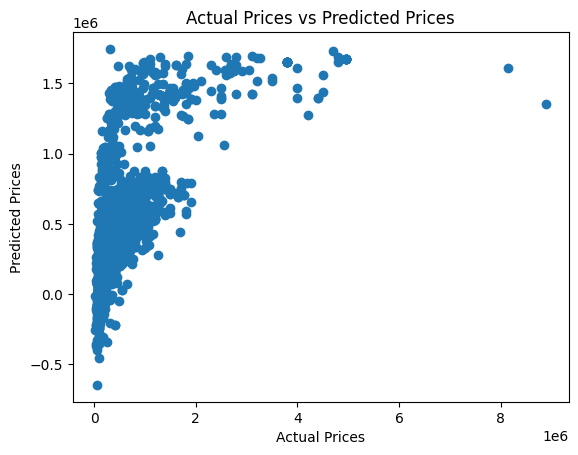

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [34]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [35]:
# R square Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.48543668756367697


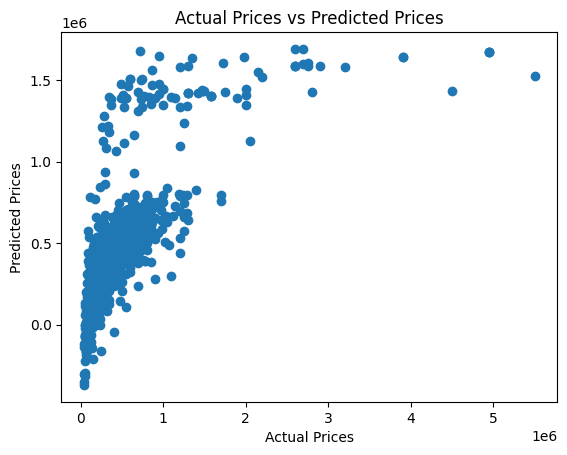

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [53]:
# Loading the Lasso regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [54]:
# prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [55]:
# R square Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.4233979052420571


Visualize the accuracy prices and Predicted prices

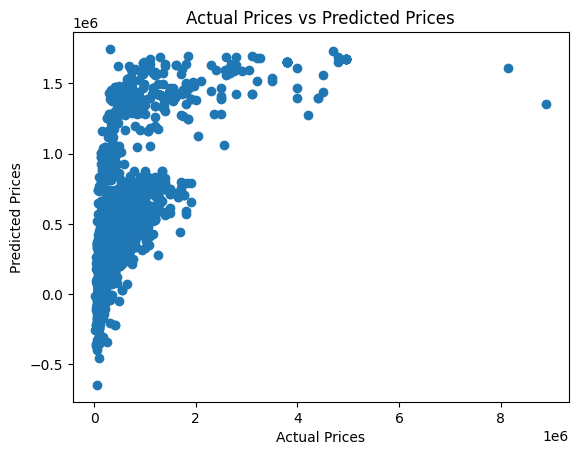

In [56]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [57]:
# prediction on test data
test_data_prediction = lasso_reg_model.predict(X_test)

In [58]:
# R square Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.4854363883270102


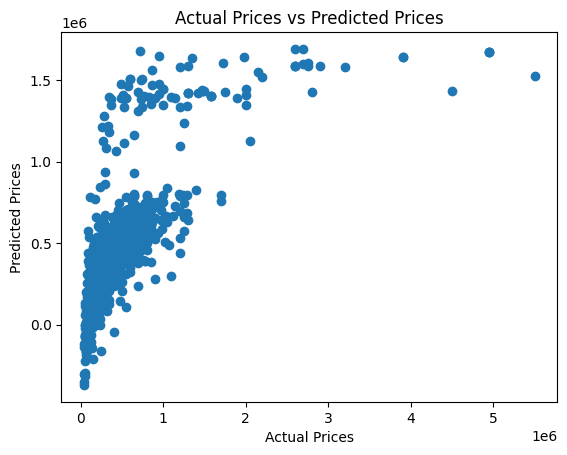

In [59]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()